In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [45]:
#importing dataset
df=pd.read_csv("newCarDetails.csv",sep='\t',usecols=['name','year','selling_price','km_driven','fuel','transmission'])
df

,name,year,selling_price,km_driven,fuel,transmission
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual
...,...,...,...,...,...,...
6094,Maruti Swift Dzire VDI,2015,615000,60000,Diesel,Manual
6095,Maruti Ertiga ZDI,2014,684000,60000,Diesel,Manual
6096,Maruti Ertiga ZDI,2014,680000,64000,Diesel,Manual
6097,Renault Duster 85PS Diesel RxE,2014,500000,120000,Diesel,Manual


# EDA 

In [46]:
df.shape # checking no of columns and rows

(6099, 6)

In [47]:
df.columns # checking all the column names 

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission'], dtype='object')

In [48]:
df.describe() # getting the description of the dataset

,year,selling_price,km_driven
count,6099.000000,6.099000e+03,6.099000e+03
mean,2013.768159,6.415849e+05,7.010146e+04
std,4.039088,8.175477e+05,5.919544e+04
min,1983.000000,2.999900e+04,1.000000e+03
25%,2011.000000,2.509990e+05,3.500000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,6.750000e+05,1.000000e+05
max,2020.000000,1.000000e+07,2.360457e+06


In [49]:
df.dtypes #checking the datatypes of variables

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
transmission     object
dtype: object

In [50]:
df.isnull().sum() # checking the null values 

name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
dtype: int64

<AxesSubplot:>

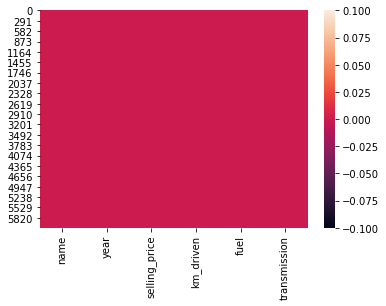

In [51]:
sns.heatmap(df.isnull()) # visualizing null values 

#### There are no null values in any column.

In [52]:
# checking for the count of unique values in each column
for i in df.columns:
    print("Count of unique values of  ", i, "is " , df[i].nunique())

Count of unique values of   name is  1802
Count of unique values of   year is  29
Count of unique values of   selling_price is  603
Count of unique values of   km_driven is  749
Count of unique values of   fuel is  4
Count of unique values of   transmission is  2


## Data Visualization

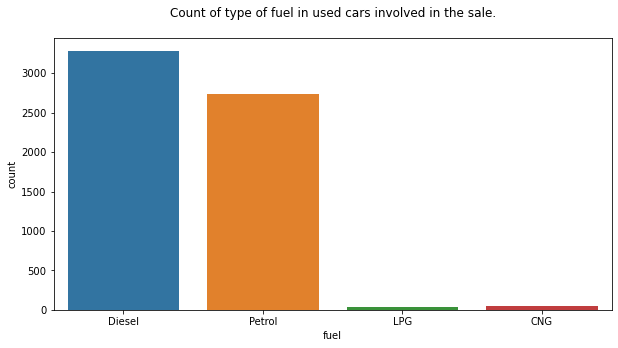

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(df["fuel"])
plt.title("Count of type of fuel in used cars involved in the sale.\n ")
plt.show() 

#### Above countplot shows that maximum no of diesel fuel cars are in sale. CNG & LPG cars are the least ones for sale

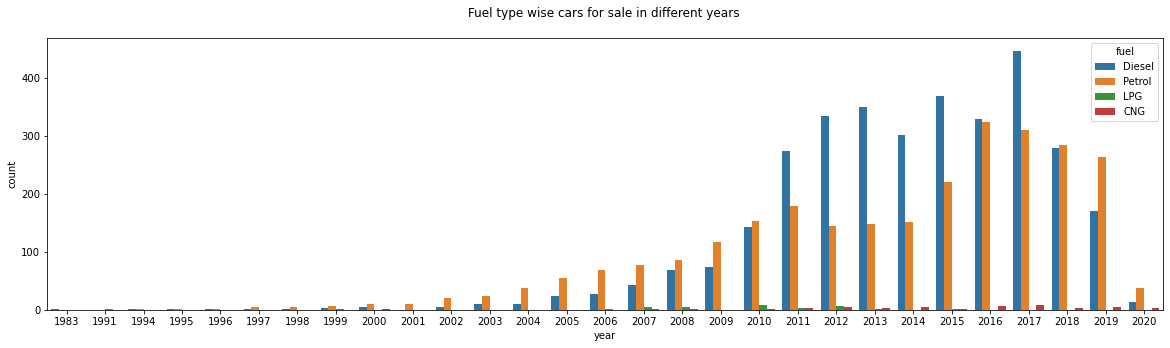

In [54]:
plt.figure(figsize=(20,5))
sns.countplot(x ='year',hue='fuel', data = df)
plt.title('Fuel type wise cars for sale in different years \n ')
plt.show()

### Above countplot shows that highest no of diesel cars were at sale in year 2017 and petrol cars in  2016 

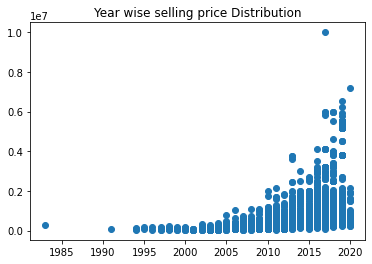

In [55]:
#plt.figure(figsize=(10,5))
plt.title('Year wise selling price Distribution')
plt.scatter(df['year'],df['selling_price'])
plt.show()

### Above scatterplot shows increase in selling price after the year 2015

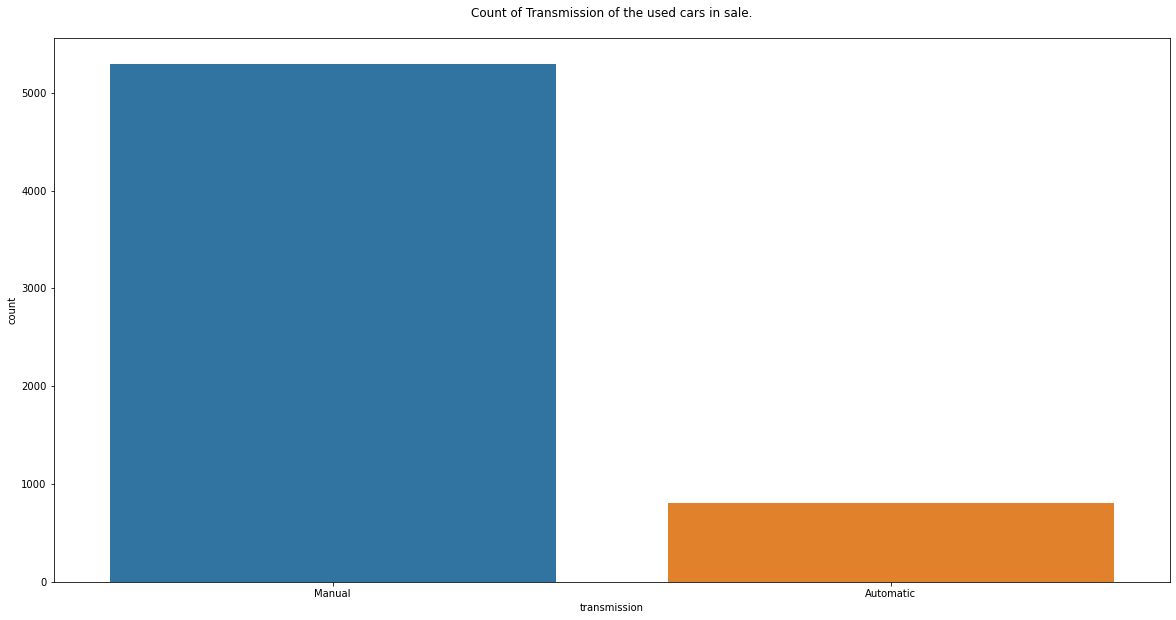

In [56]:

plt.figure(figsize=(20,10))
sns.countplot(df["transmission"])
plt.title("Count of Transmission of the used cars in sale.\n ")
plt.show() 

#### Above countplot shows manually transmitted used cars are maximum in sale.

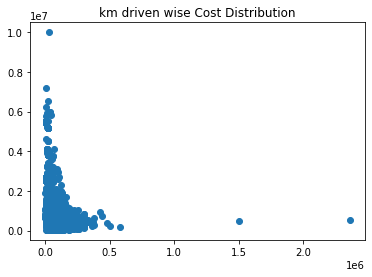

In [57]:
plt.title('km driven wise Cost Distribution')
plt.scatter(df['km_driven'],df['selling_price'])
plt.show()

### Data preprocessing - Label Encoding

In [58]:
# extracting all the categorical columns
df_cat=df.select_dtypes(include=['object']).columns.tolist()
df_cat

['name', 'fuel', 'transmission']

In [59]:
# changing the nominal value to integer for training model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['name', 'fuel', 'transmission']
for val in df_cat:
    df[val]=le.fit_transform(df[val].astype(str))

In [60]:
df.head(5)

,name,year,selling_price,km_driven,fuel,transmission
0,1146,2014,450000,145500,1,1
1,1409,2014,370000,120000,1,1
2,320,2006,158000,140000,3,1
3,673,2010,225000,127000,1,1
4,1185,2007,130000,120000,3,1


In [61]:
dfcorr=df.corr() # checking the corelation between features
dfcorr

,name,year,selling_price,km_driven,fuel,transmission
name,1.000000,-0.027481,-0.077902,0.090937,-0.100134,0.031277
year,-0.027481,1.000000,0.415288,-0.397613,-0.059312,-0.246774
selling_price,-0.077902,0.415288,1.000000,-0.218985,-0.190284,-0.590717
km_driven,0.090937,-0.397613,-0.218985,1.000000,-0.245447,0.198105
fuel,-0.100134,-0.059312,-0.190284,-0.245447,1.000000,-0.034887
transmission,0.031277,-0.246774,-0.590717,0.198105,-0.034887,1.000000


<AxesSubplot:>

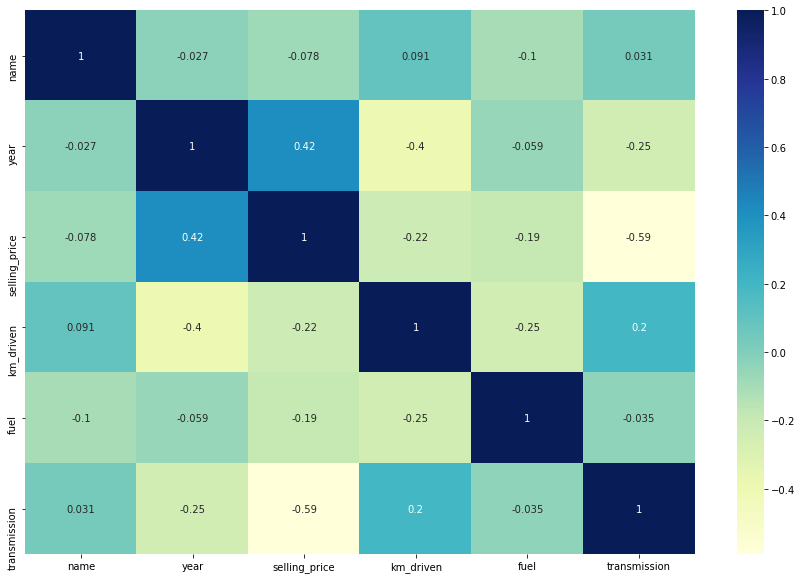

In [62]:
plt.figure(figsize=(15,10)) # visualization for correlation
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

#### key observations
1. transmission and seller type are negatively correlated with target variable.
2. year and selling price are highly correlated.

In [63]:
df.skew()# checking for skewness 

name             -0.057822
year             -1.069080
selling_price     4.181611
km_driven        12.706186
fuel              0.164965
transmission     -2.177153
dtype: float64

In [64]:
# seperatng the target variable - Price
df_x=df.drop(columns=['selling_price'])
y_t=pd.DataFrame(df['selling_price'])
print(df_x.shape, y_t.shape)

(6099, 5) (6099, 1)


In [65]:
from sklearn.preprocessing import power_transform

In [66]:
df_x=power_transform(df_x,method='yeo-johnson') # removing the skewness

In [67]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledX=sc.fit_transform(df_x)
scaledX.shape

(6099, 5)

### Data Modelling

In [68]:
# importing our libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor, ExtraTreesRegressor 

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error,mean_squared_error

#### finding the best random state

In [70]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y_t,test_size=.22,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=r2_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 96.56932504286156 Random state 121


#### using the best random state

In [71]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,y_t,test_size=.22,random_state=121)

In [72]:
x_train.shape , x_test.shape

((4757, 5), (1342, 5))

In [73]:
y_train.shape , y_test.shape

((4757, 1), (1342, 1))

# Finding the best model


In [74]:
#using algorithms in for loops
model=[LinearRegression(),BaggingRegressor(),ExtraTreesRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    cvscore=cross_val_score(m,x_train,y_train,cv=5).mean()
    print(m , "\nAccuracy Score of " ,r2score*100, "Cross Val Score", {cvscore*100})
    print("**********************************************************************\n")

LinearRegression() 
Accuracy Score of  50.39707298042586 Cross Val Score {47.43097839899371}
**********************************************************************

BaggingRegressor() 
Accuracy Score of  96.04688377468011 Cross Val Score {90.06583258561365}
**********************************************************************

ExtraTreesRegressor() 
Accuracy Score of  94.62853158960407 Cross Val Score {89.44247593671201}
**********************************************************************

DecisionTreeRegressor() 
Accuracy Score of  94.92543512960394 Cross Val Score {87.9033091707932}
**********************************************************************

RandomForestRegressor() 
Accuracy Score of  96.60378446920109 Cross Val Score {90.76873280717501}
**********************************************************************

GradientBoostingRegressor() 
Accuracy Score of  92.53956547189229 Cross Val Score {87.92777093937423}
*************************************************************

#### Hyperparameter Tuning

In [75]:
# GradientBoostingRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [76]:
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap':[True],'criterion':['mse'] , 
              'max_features':['auto'],  'bootstrap': [True], 'max_depth': [58, 60, None], 'n_estimators': [10, 11, 12, 13, 15,20,25,29,30]}

In [77]:
rfr = RandomForestRegressor()# performing GridSearchCV with parameters
g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 5, n_jobs = -1)

In [78]:
g_search.fit(x_train, y_train);# passing parametrs to train model
print(g_search.best_params_) # finding best parameters

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 58, 'max_features': 'auto', 'n_estimators': 29}


In [79]:
# implementing with best parameters
rf = RandomForestRegressor(bootstrap= True, criterion ='mse', max_depth =58, max_features= 'auto',n_estimators= 29)
rf = rf.fit(x_train, y_train)
print(" Score is ",rf.score(x_train,y_train))
predrf = rf.predict(x_test)
print("Mean Absolute error  " , mean_absolute_error(y_test,predrf))
print("Mean Squared error \n",mean_squared_error(y_test,predrf))
print("Root mean Squared error is \n",np.sqrt(mean_squared_error(y_test,predrf)))
print("r2 score " , r2_score(y_test,predrf))
print("**********************************************************************\n")

 Score is  0.9853078244543971
Mean Absolute error   81431.1849945534
Mean Squared error 
 24284559949.593544
Root mean Squared error is 
 155835.04082713087
r2 score  0.9624839376711817
**********************************************************************



# Conclusion

RandomForestRegressor() is best performing model with r2score 96.24% and cross validation score with 90.76%

# Saving the model- Serialization

In [80]:
# saving the prediction model

import pickle
filename="carprice.pkl"
pickle.dump(rf,open(filename,'wb'))

In [81]:
pred=rf.predict(x_test)

In [82]:
ds_pred=pd.DataFrame(data=pred.round(2),columns=['price'])
ds_pred

,price
0,614482.76
1,138620.69
2,391758.62
3,645000.00
4,100499.97
...,...
1337,118764.29
1338,3800000.00
1339,234413.79
1340,478965.52
